# Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\MLR\ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
data.shape

(1436, 11)

In [5]:
data.isnull().sum() # there are no null values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
data["Fuel_Type"]=data["Fuel_Type"].astype("category") # we converted the object type into category

In [7]:
data.info() # here we can see the difference 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Price      1436 non-null   int64   
 1   Age_08_04  1436 non-null   int64   
 2   KM         1436 non-null   int64   
 3   Fuel_Type  1436 non-null   category
 4   HP         1436 non-null   int64   
 5   Automatic  1436 non-null   int64   
 6   cc         1436 non-null   int64   
 7   Doors      1436 non-null   int64   
 8   Cylinders  1436 non-null   int64   
 9   Gears      1436 non-null   int64   
 10  Weight     1436 non-null   int64   
dtypes: category(1), int64(10)
memory usage: 113.8 KB


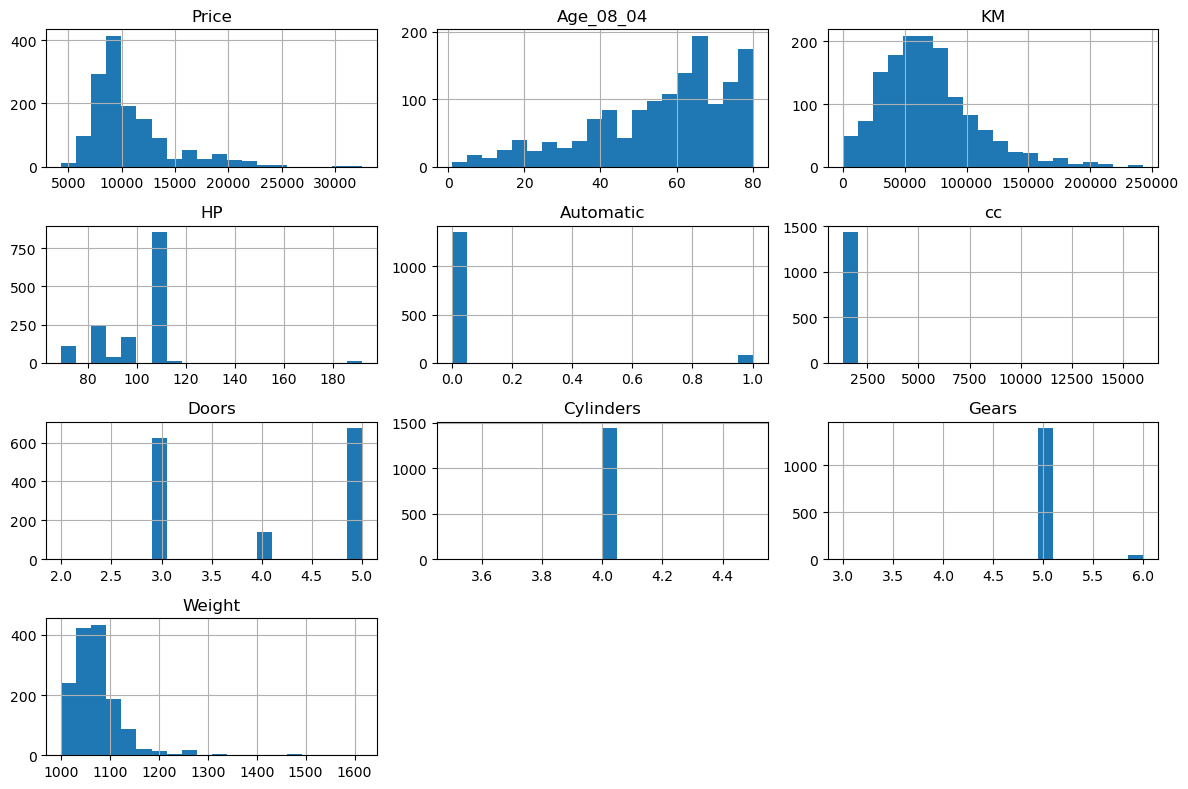

In [8]:
data.hist(bins=20,figsize=(12,8))
plt.tight_layout()
plt.show()

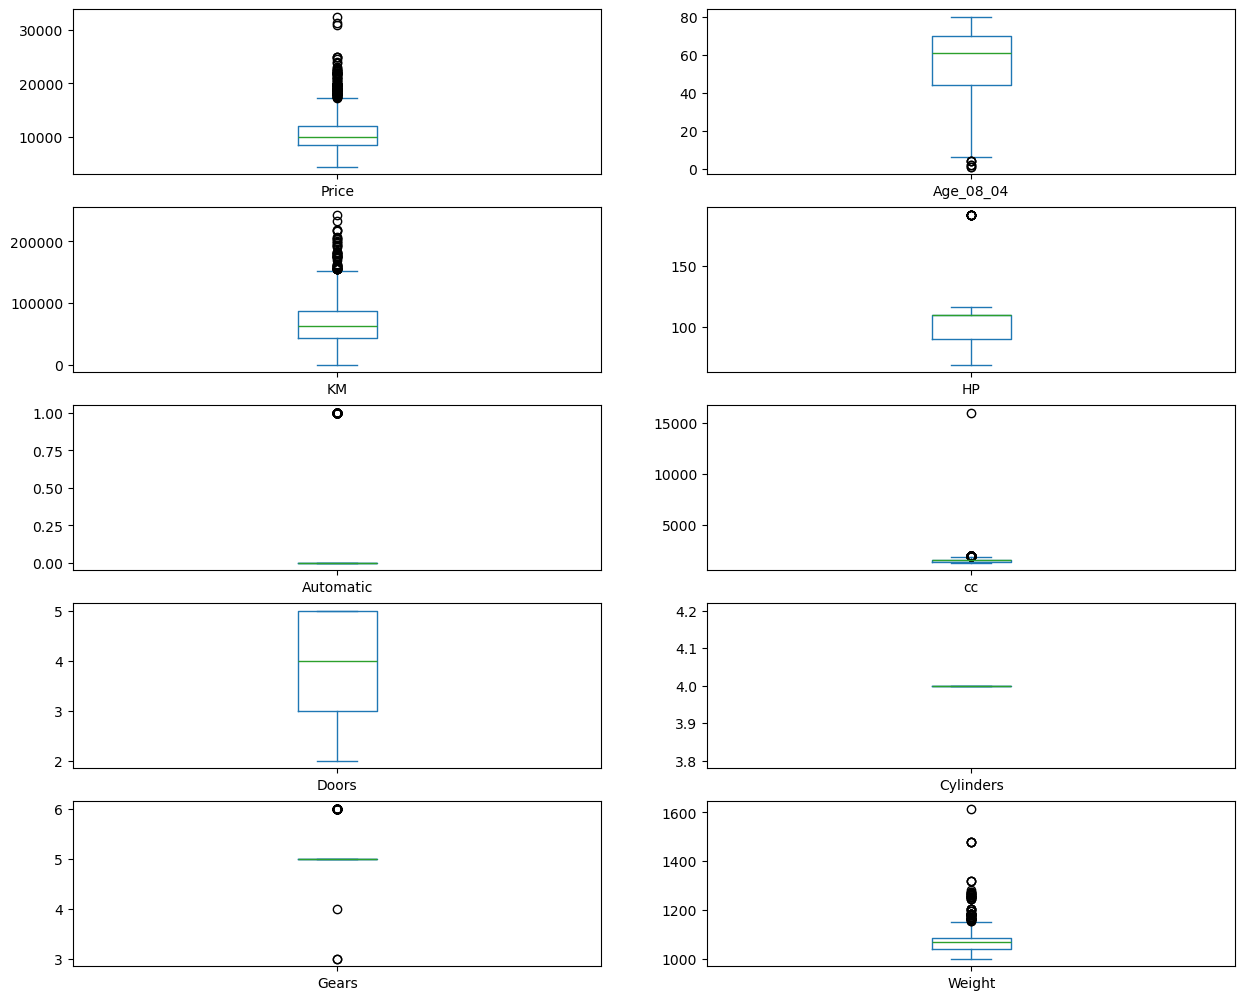

In [9]:
data.plot(kind="box",layout=(6,2),figsize=(15,15),subplots=True)
plt.show()

In [10]:
data.select_dtypes(include='number').skew()

Price         1.703885
Age_08_04    -0.826702
KM            1.015912
HP            0.955836
Automatic     3.878197
cc           27.431793
Doors        -0.076395
Cylinders     0.000000
Gears         2.283960
Weight        3.108639
dtype: float64

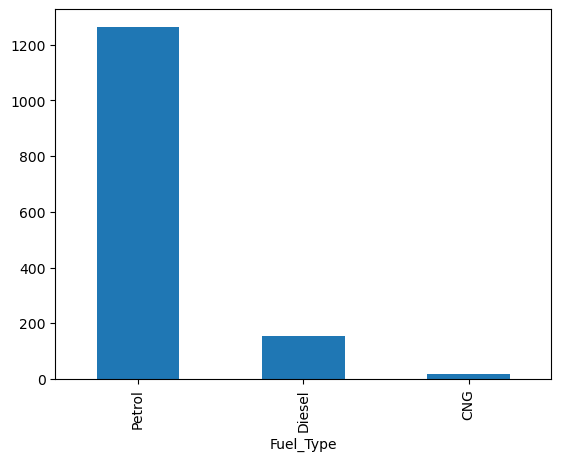

In [11]:
data["Fuel_Type"].value_counts().plot(kind="bar")
plt.show()

In [12]:
data.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [13]:
data["cc"].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [14]:
data.loc[data.HP==192,"HP"]

8      192
10     192
11     192
12     192
13     192
14     192
15     192
16     192
49     192
53     192
141    192
Name: HP, dtype: int64

In [15]:
data.select_dtypes(include="int").drop(columns=["Age_08_04",'Doors',
 'Cylinders',
 'Gears','Automatic']).columns.tolist()

['Price', 'KM', 'HP', 'cc', 'Weight']

In [16]:
Q1={}
Q3={}
IQR={}
UE={}
LE={}
for i in  data.select_dtypes(include="int").drop(columns=["Age_08_04",'Doors',
 'Cylinders','Gears','Automatic']).columns.tolist() :
     data[i]=np.log1p(data[i])
     Q1[i]=data[i].quantile(0.25)
     Q3[i]=data[i].quantile(0.75)
     IQR[i]=Q3[i]-Q1[i]
     UE[i]=Q3[i]+1.5*IQR[i]
     LE[i]=Q1[i]-1.5*IQR[i]
     data.loc[data[i]>UE[i],i]=UE[i]
     data.loc[data[i]<LE[i],i]=LE[i]
     print(i)

Price
KM
HP
cc
Weight


In [17]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,9.510519,23,10.757626,Diesel,4.510860,0,7.578547,3,4,5,7.053736
1,9.528867,23,11.197365,Diesel,4.510860,0,7.578547,3,4,5,7.053736
2,9.543306,24,10.638544,Diesel,4.510860,0,7.578547,3,4,5,7.053736
3,9.612533,26,10.778977,Diesel,4.510860,0,7.578547,3,4,5,7.053736
4,9.528867,30,10.558439,Diesel,4.510860,0,7.578547,3,4,5,7.053736
...,...,...,...,...,...,...,...,...,...,...,...
1431,8.922792,69,9.930373,Petrol,4.465908,0,7.170888,3,4,5,6.933423
1432,9.291552,72,9.852247,Petrol,4.465908,0,7.170888,3,4,5,6.923629
1433,9.047939,71,9.741968,Petrol,4.465908,0,7.170888,3,4,5,6.923629
1434,8.888895,70,9.736074,Petrol,4.465908,0,7.170888,3,4,5,6.923629


In [18]:
df=pd.DataFrame([Q1,Q3,IQR,UE,LE],index=["Q1", "Q3", "IQR", "Upper Bound", "Lower Bound"])
df

,Price,KM,HP,cc,Weight
Q1,9.042040,10.668979,4.510860,7.244942,6.947937
Q3,9.388570,11.373913,4.709530,7.378384,6.990257
IQR,0.346530,0.704935,0.198671,0.133442,0.042319
Upper Bound,9.908366,12.431315,5.007536,7.578547,7.053736
Lower Bound,8.522245,9.611577,4.212853,7.044778,6.884458


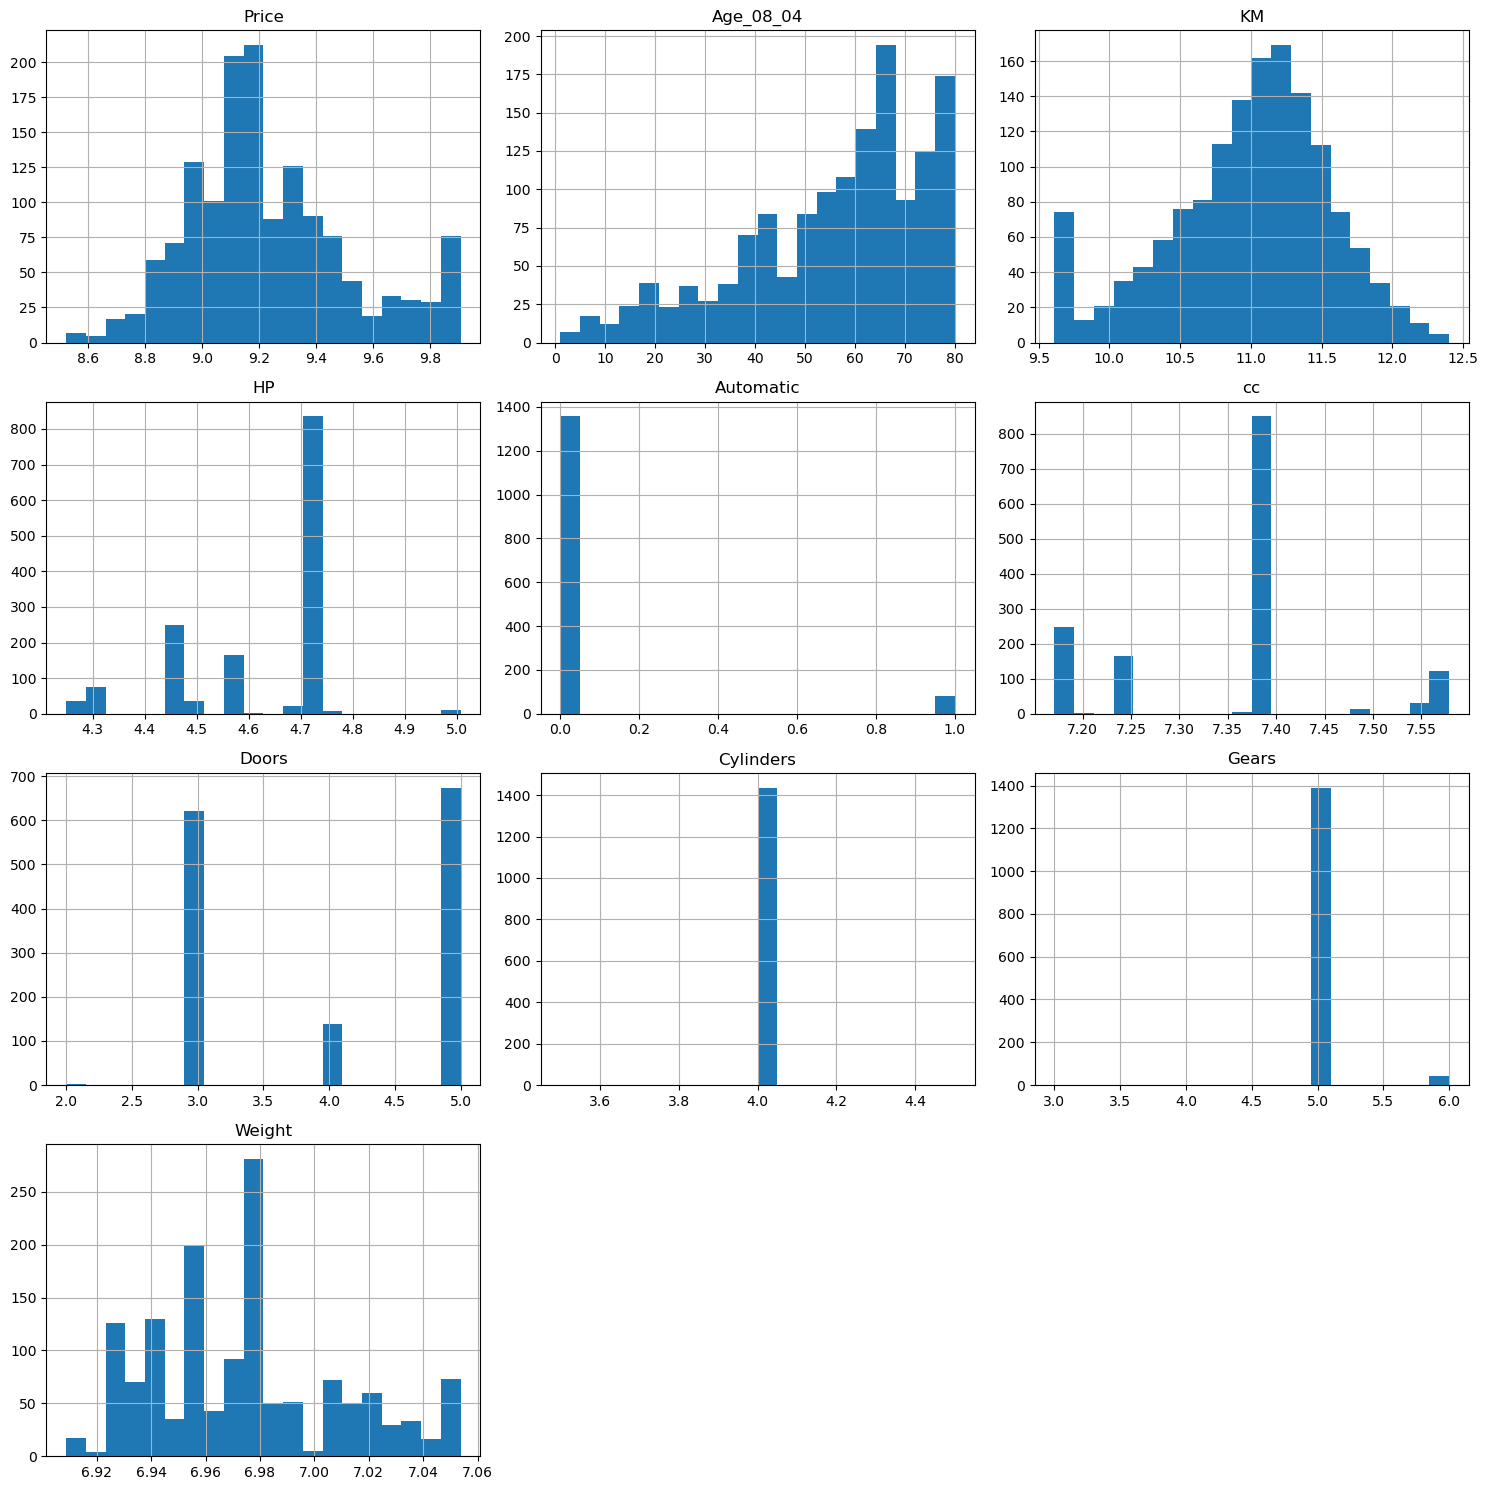

In [19]:
data.hist(bins=20,figsize=(15,15))
plt.tight_layout()
plt.show()

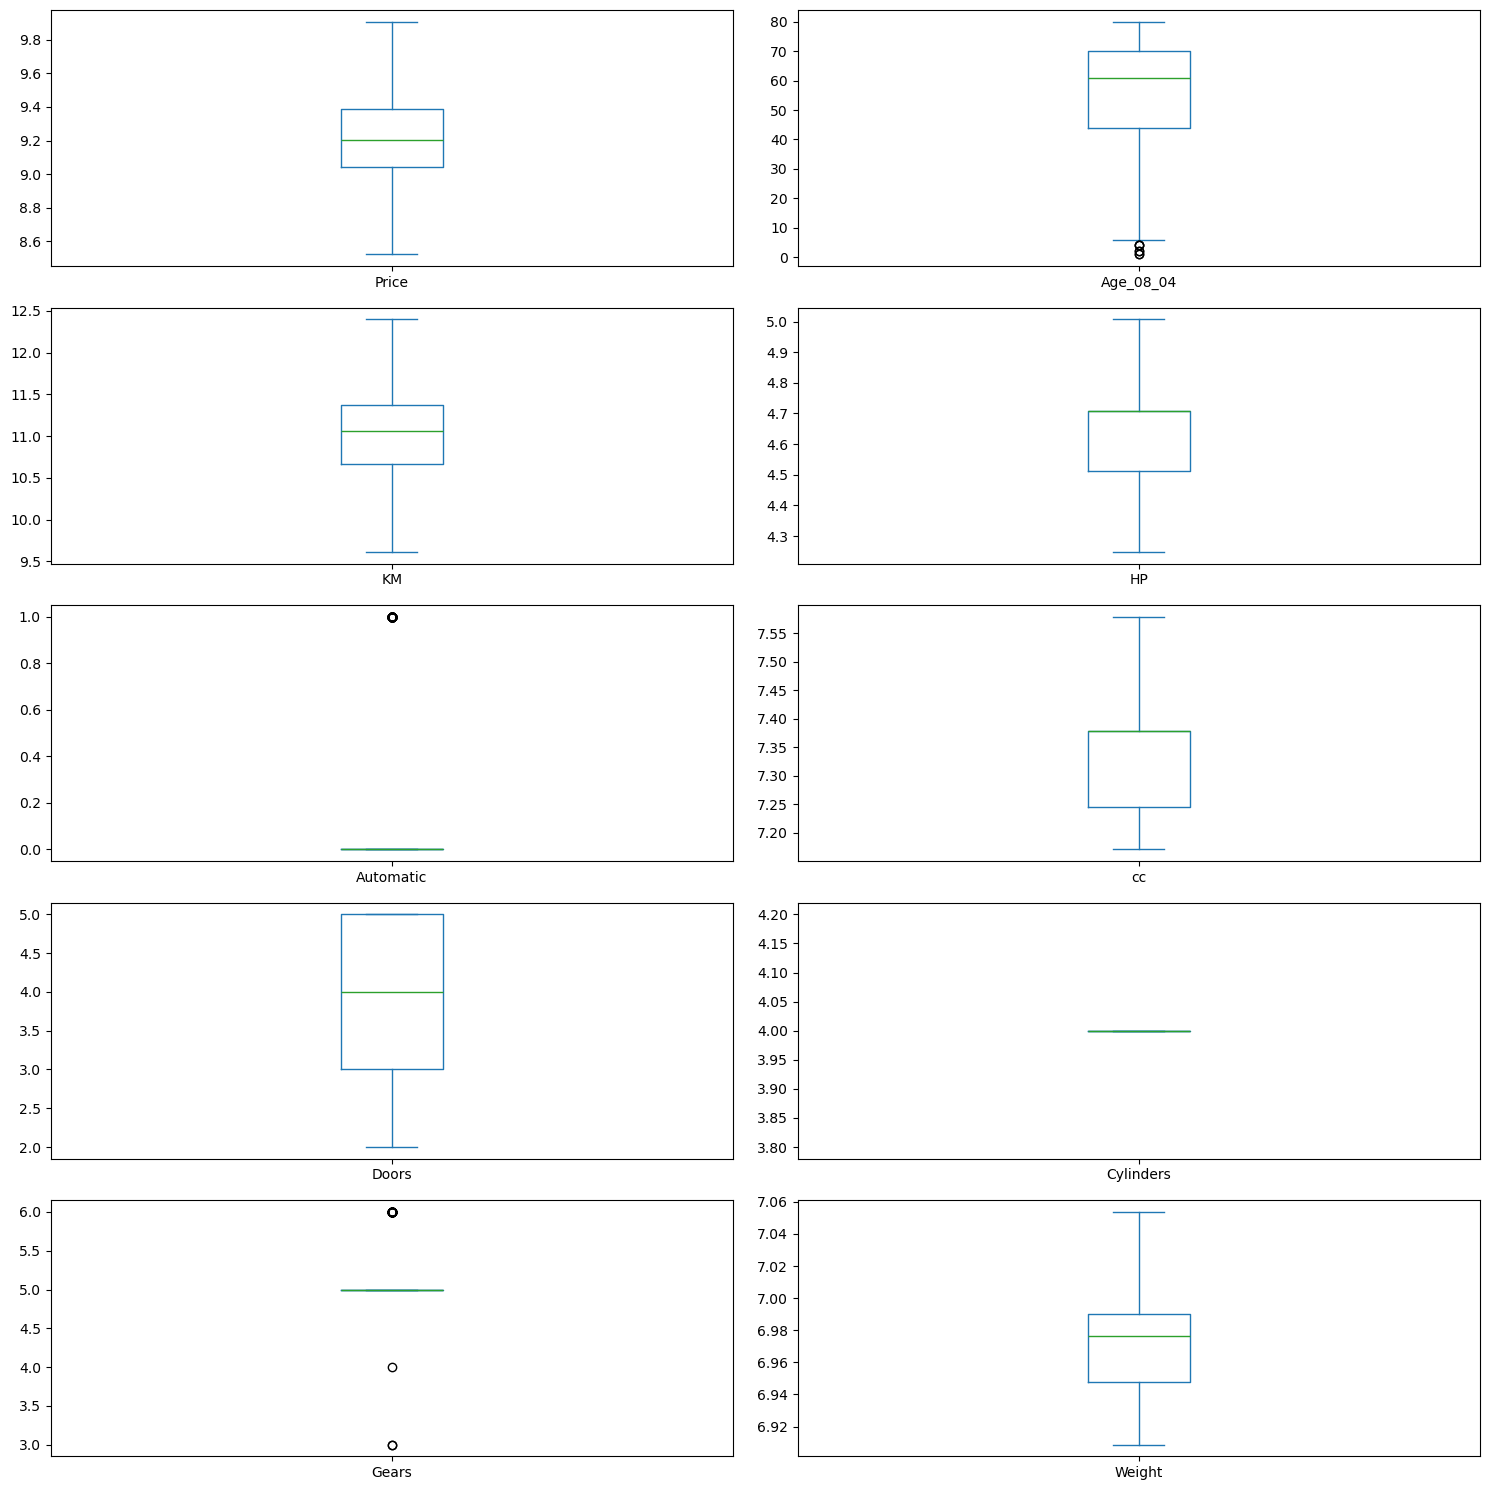

In [20]:
data.plot(kind="box",subplots=True,layout=(5,2),figsize=(15,15))
plt.tight_layout()
plt.show()

In [21]:
data1=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\MLR\ToyotaCorolla - MLR.csv")

In [22]:
data1["Fuel_Type"]=data1["Fuel_Type"].astype("category") 

In [23]:
Q_1={}
Q_3={}
IQR_={}
UE_={}
LE_={}
for i in  data1.select_dtypes(include="int").drop(columns=["Age_08_04",'Doors',
 'Cylinders',
 'Gears','Automatic']).columns.tolist() :
    Q_1[i]=data1[i].quantile(0.25)
    Q_3[i]=data1[i].quantile(0.75)
    IQR_[i]=Q_3[i]-Q_1[i]
    UE_[i]=Q_3[i]+1.5*IQR_[i]
    LE_[i]=Q_1[i]-1.5*IQR_[i]
    data1.loc[data1[i]>UE_[i],i]=UE_[i]
    data1.loc[data1[i]<LE_[i],i]=LE_[i]
    print(i)
    

Price
KM
HP
cc
Weight


C:\Users\rosha\AppData\Local\Temp\ipykernel_13068\4253675058.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153051.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data1.loc[data1[i]>UE_[i],i]=UE_[i]
C:\Users\rosha\AppData\Local\Temp\ipykernel_13068\4253675058.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1152.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data1.loc[data1[i]>UE_[i],i]=UE_[i]


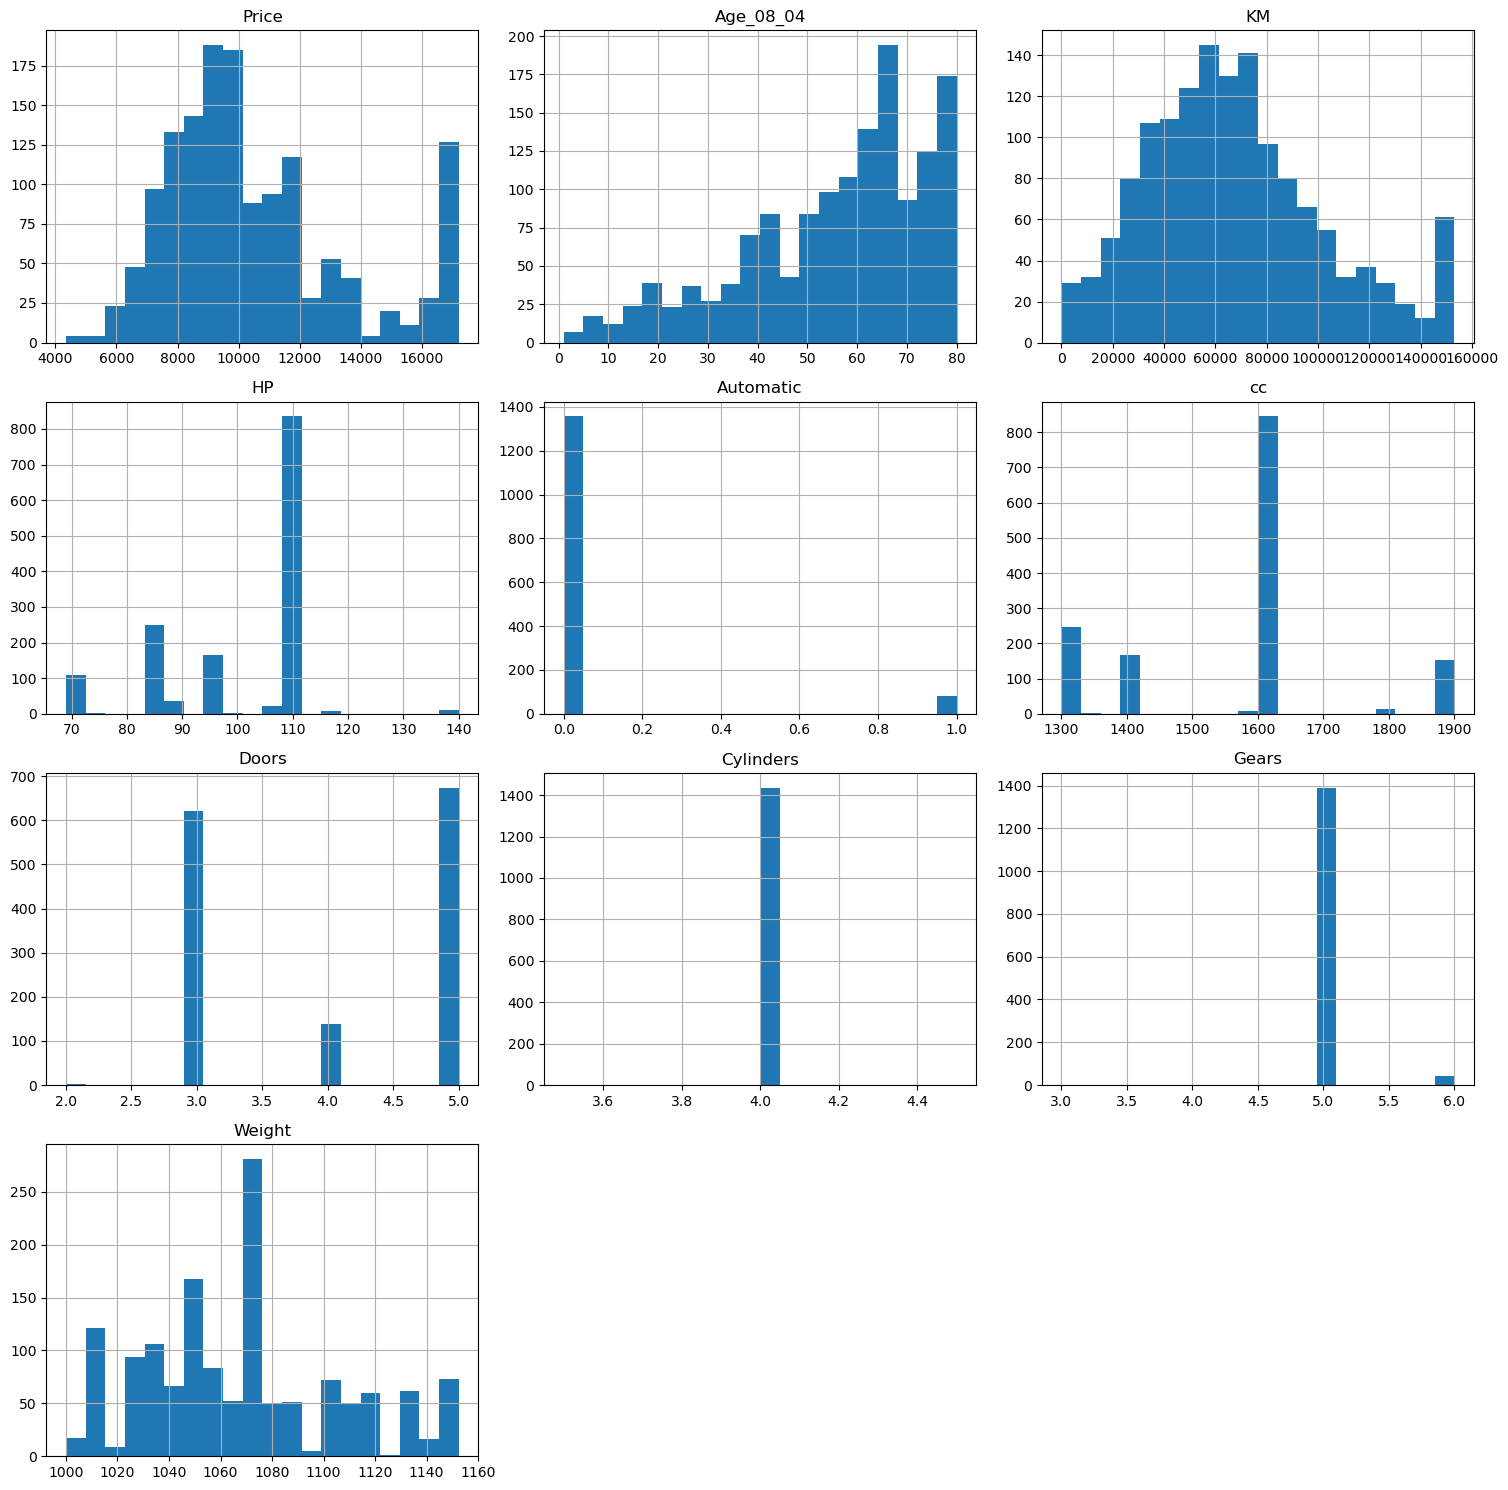

In [24]:
data1.hist(bins=20,figsize=(15,15))
plt.tight_layout()
plt.show()

In [25]:
df=pd.DataFrame([Q_1,Q_3,IQR_,UE_,LE_],index=["Q1", "Q3", "IQR", "Upper Bound", "Lower Bound"])
df

,Price,KM,HP,cc,Weight
Q1,8450.0,43000.000,90.0,1400.0,1040.0
Q3,11950.0,87020.750,110.0,1600.0,1085.0
IQR,3500.0,44020.750,20.0,200.0,45.0
Upper Bound,17200.0,153051.875,140.0,1900.0,1152.5
Lower Bound,3200.0,-23031.125,60.0,1100.0,972.5


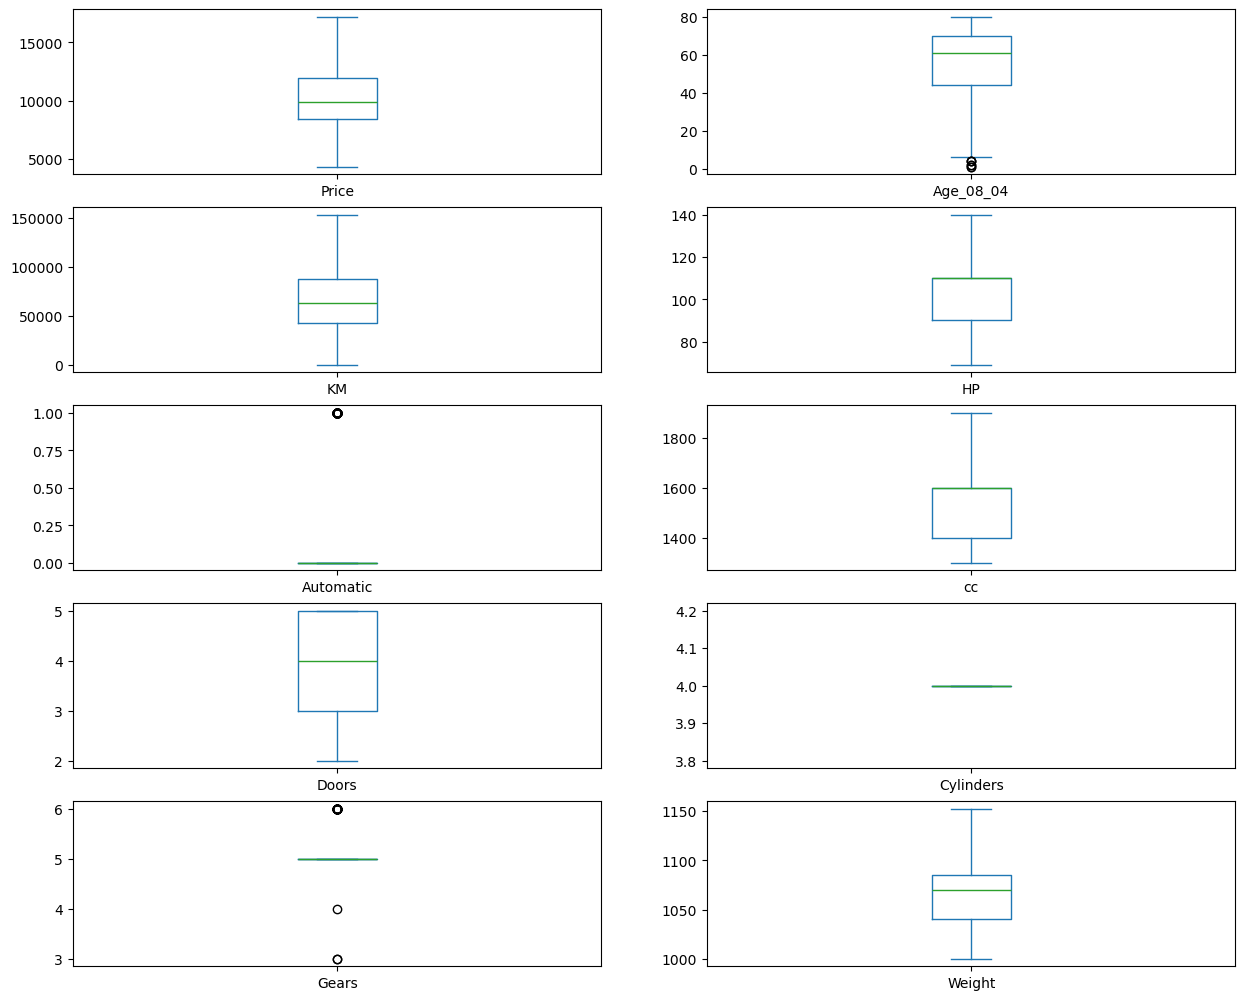

In [26]:
data1.plot(kind="box",layout=(6,2),figsize=(15,15),subplots=True)
plt.show()

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,drop=None)
encoded=encoder.fit_transform(data[["Fuel_Type"]])
encode=encoder.get_feature_names_out(data.select_dtypes(include="category").columns)
encode_df=pd.DataFrame(encoded,columns=encode)
encode_df

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [28]:
data.drop(columns="Fuel_Type",inplace=True)

In [29]:
data1.drop(columns="Fuel_Type",inplace=True)

In [30]:
data=pd.concat([data,encode_df],axis=1)


In [31]:
data1=pd.concat([data1,encode_df],axis=1)


In [32]:
data1

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
1,13750,23,72937.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
2,13950,24,41711.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
3,14950,26,48000.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
4,13750,30,38500.0,90,0,1900,3,4,5,1152.5,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,0,1300,3,4,5,1025.0,0.0,0.0,1.0
1432,10845,72,19000.0,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0
1433,8500,71,17016.0,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0
1434,7250,70,16916.0,86,0,1300,3,4,5,1015.0,0.0,0.0,1.0


In [33]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,9.510519,23,10.757626,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
1,9.528867,23,11.197365,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
2,9.543306,24,10.638544,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
3,9.612533,26,10.778977,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
4,9.528867,30,10.558439,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,8.922792,69,9.930373,4.465908,0,7.170888,3,4,5,6.933423,0.0,0.0,1.0
1432,9.291552,72,9.852247,4.465908,0,7.170888,3,4,5,6.923629,0.0,0.0,1.0
1433,9.047939,71,9.741968,4.465908,0,7.170888,3,4,5,6.923629,0.0,0.0,1.0
1434,8.888895,70,9.736074,4.465908,0,7.170888,3,4,5,6.923629,0.0,0.0,1.0


# Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [36]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,10.757626,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
1,23,11.197365,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
2,24,10.638544,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
3,26,10.778977,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
4,30,10.558439,4.510860,0,7.578547,3,4,5,7.053736,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,9.930373,4.465908,0,7.170888,3,4,5,6.933423,0.0,0.0,1.0
1432,72,9.852247,4.465908,0,7.170888,3,4,5,6.923629,0.0,0.0,1.0
1433,71,9.741968,4.465908,0,7.170888,3,4,5,6.923629,0.0,0.0,1.0
1434,70,9.736074,4.465908,0,7.170888,3,4,5,6.923629,0.0,0.0,1.0


In [37]:
y

0       9.510519
1       9.528867
2       9.543306
3       9.612533
4       9.528867
          ...   
1431    8.922792
1432    9.291552
1433    9.047939
1434    8.888895
1435    8.846641
Name: Price, Length: 1436, dtype: float64

In [38]:
#from sklearn.preprocessing import  StandardScaler  # from sklearn.preprocessing import StandardScaler

In [39]:
#standard=StandardScaler()
#stand=standard.fit_transform(data)

In [40]:
#stand

In [41]:
#numbercol=data.select_dtypes(include="number")
#numbercol

In [42]:
#standarized=pd.DataFrame(standard.fit_transform(data.select_dtypes(include="number")),columns=numbercol.columns)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import statsmodels.formula.api as smf

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
multi=LinearRegression()
model=multi.fit(x_train,y_train)

In [82]:
model.coef_

array([-1.01098547e-02, -8.42356662e-02,  3.64521047e-01,  3.14938145e-02,
       -3.31909874e-01,  1.90638232e-03,  2.22044605e-16,  7.10903701e-02,
        1.81083710e+00, -9.75656692e-02,  7.25262783e-02,  2.50393908e-02])

In [83]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [84]:
model.score(x_test,y_test)

0.8415787223437264

In [86]:
y_pred=model.predict(x_test)

In [85]:
r2_score(y_test,y_pred)

0.8415787223437264

In [51]:
x1=data1.iloc[:,1:]
y1=data1.iloc[:,0]

In [52]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [53]:
multi1=LinearRegression()
model1=multi.fit(x1_train,y1_train)
model1

LinearRegression()

In [54]:
model1.score(x1_test,y1_test)

0.8628692773807858

In [55]:
model1.coef_

array([-1.06367003e+02, -1.46231646e-02,  2.58459287e+01,  4.42109161e+01,
       -2.45145812e+00, -7.25802779e+01, -8.52651283e-14,  4.98238000e+02,
        2.44652317e+01, -7.65099488e+02,  3.31741953e+02,  4.33357536e+02])

<Axes: >

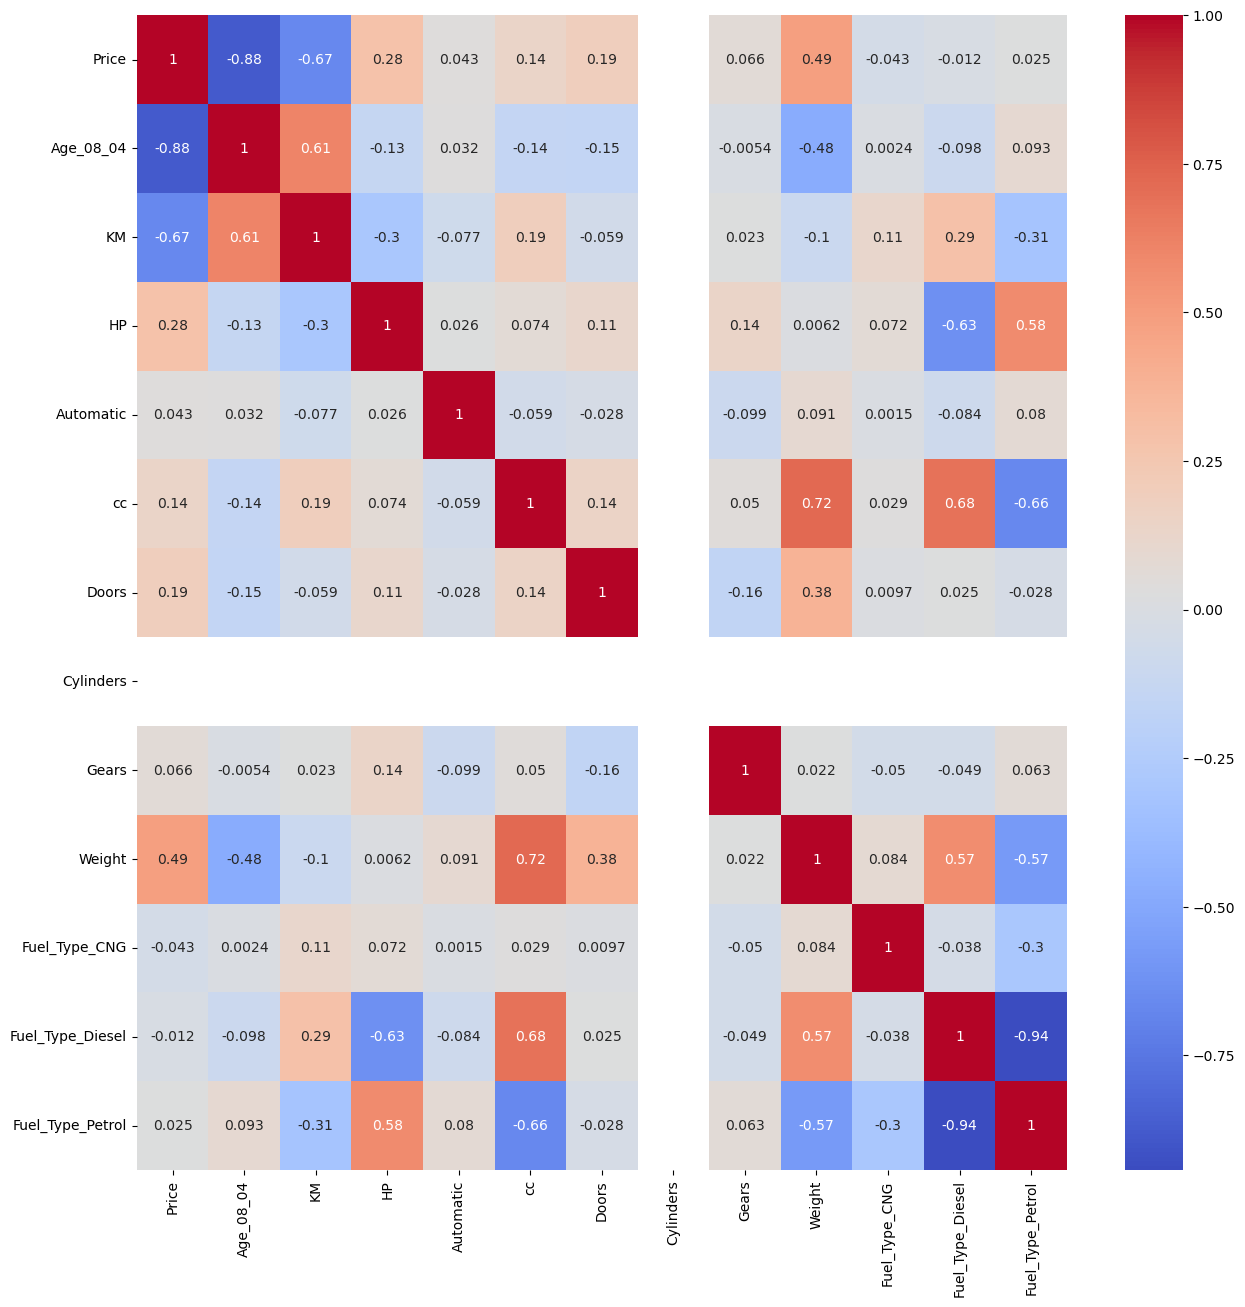

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [98]:
lasso=Lasso(alpha=0.1)
modellasso=lasso.fit(x_train,y_train)
modellasso


Lasso(alpha=0.1)

In [99]:
modellasso.score(x_test,y_test)

0.7717737435420754

In [59]:
modellasso.coef_

array([-0.01092244, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ])

In [90]:
lasso=Lasso(alpha=0.1)
modellasso1=lasso.fit(x1_train,y1_train)
modellasso1

Lasso(alpha=0.1)

In [91]:
modellasso1.score(x1_test,y1_test)

0.8628675843709518

In [62]:
modellasso1.coef_

array([-1.06273693e+02, -1.47087574e-02,  2.57180972e+01,  2.39917984e+01,
       -2.44147001e+00, -7.24609252e+01,  0.00000000e+00,  4.75563354e+02,
        2.44684952e+01, -1.02892231e+03,  0.00000000e+00,  1.05714525e+02])

In [63]:
ridge=Ridge(alpha=0.1)
modelridge=ridge.fit(x_train,y_train)
modelridge


Ridge(alpha=0.1)

In [64]:
modelridge.score(x_test,y_test)

0.8424456218823955

In [65]:
modelridge.coef_

array([-0.01038742, -0.08560955,  0.34750138,  0.04233494, -0.24299562,
        0.00609131,  0.        ,  0.07631485,  1.37880097, -0.08978059,
        0.0694291 ,  0.0203515 ])

In [66]:
ridge=Ridge(alpha=0.1)
modelridge1=ridge.fit(x1_train,y1_train)
modelridge1


Ridge(alpha=0.1)

In [67]:
modelridge1.score(x1_test,y1_test)

0.8628715871711384

In [68]:
modelridge1.coef_

array([-1.06368612e+02, -1.46286917e-02,  2.57605681e+01,  4.38471692e+01,
       -2.44414015e+00, -7.26221720e+01,  0.00000000e+00,  4.97295614e+02,
        2.44648475e+01, -7.60357698e+02,  3.26907679e+02,  4.33450019e+02])

In [69]:
e_ne = ElasticNet(alpha = .1,l1_ratio=.5)
e_net=e_ne.fit(x_train, y_train)
e_net

ElasticNet(alpha=0.1)

In [77]:
e_net.score(x_test,y_test)

0.7724111625459553

In [71]:
e_net.coef_

array([-0.01333465, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ])

In [72]:
e_ne = ElasticNet(alpha = .1,l1_ratio=.5)
e_net1=e_ne.fit(x1_train, y1_train)
e_net1

ElasticNet(alpha=0.1)

In [78]:
e_net1.score(x1_test,y1_test)

0.8629651070621487

In [74]:
e_net1.coef_

array([-1.06036757e+02, -1.54450223e-02,  2.36508860e+01,  9.59472907e+00,
       -2.19769090e+00, -7.38445431e+01,  0.00000000e+00,  2.29879222e+02,
        2.39716916e+01, -2.17850183e+02,  1.47275516e+01,  2.02122652e+02])

In [94]:
df1=pd.DataFrame([model.coef_,model1.coef_,modellasso.coef_,modellasso1.coef_,modelridge.coef_,modelridge1.coef_,e_net.coef_,e_net1.coef_],index=["model", "model1", "lasso", "lasso1", "ridge", "ridge1", "enet", "enet1"],columns=["Age_08_04", "KM", "HP", "Automatic", "cc", "Doors",
    "Cylinders", "Gears", "Weight",
    "Fuel_Type_CNG", "Fuel_Type_Diesel", "Fuel_Type_Petrol"])
df1

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
model,-0.010110,-0.084236,0.364521,0.031494,-0.331910,0.001906,2.220446e-16,0.071090,1.810837,-0.097566,0.072526,0.025039
model1,-106.367003,-0.014623,25.845929,44.210916,-2.451458,-72.580278,-8.526513e-14,498.238000,24.465232,-765.099488,331.741953,433.357536
lasso,-0.013195,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.000000,-0.000000,0.000000
lasso1,-106.356636,-0.014633,25.831723,41.964342,-2.450348,-72.567018,0.000000e+00,495.718595,24.465594,-1089.294768,0.000000,102.071120
ridge,-0.010387,-0.085610,0.347501,0.042335,-0.242996,0.006091,0.000000e+00,0.076315,1.378801,-0.089781,0.069429,0.020351
ridge1,-106.368612,-0.014629,25.760568,43.847169,-2.444140,-72.622172,0.000000e+00,497.295614,24.464848,-760.357698,326.907679,433.450019
enet,-0.013335,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.000000,-0.000000,0.000000
enet1,-106.036757,-0.015445,23.650886,9.594729,-2.197691,-73.844543,0.000000e+00,229.879222,23.971692,-217.850183,14.727552,202.122652


In [95]:
df2=pd.DataFrame([model.score(x_test,y_test),model1.score(x1_test,y1_test),modellasso.score(x_test,y_test),modellasso1.score(x1_test,y1_test),modelridge.score(x_test,y_test),modelridge1.score(x1_test,y1_test),e_net.score(x_test,y_test),e_net1.score(x1_test,y1_test)],index=["model", "model1", "lasso", "lasso1", "ridge", "ridge1", "enet", "enet1"],columns=["score"])
df2

,score
model,0.841579
model1,0.862869
lasso,0.771774
lasso1,0.862868
ridge,0.842446
ridge1,0.862872
enet,0.772411
enet1,0.862965


In [101]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(alpha=0.1),
    'Ridge':Ridge(alpha=0.1),
    'ElasticNet': ElasticNet(alpha = .1,l1_ratio=.5)
}
models

{'Linear Regression': LinearRegression(),
 'Lasso': Lasso(alpha=0.1),
 'Ridge': Ridge(alpha=0.1),
 'ElasticNet': ElasticNet(alpha=0.1)}

In [102]:
results=[]
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test,y_pred),
    mse=mean_squared_error(y_test,y_pred),
    mae=mean_absolute_error(y_test,y_pred)
    results.append([name,r2,mse,mae])
results

[['Linear Regression',
  (0.8415787223437264,),
  (0.012509295681107306,),
  0.08363746737420644],
 ['Lasso', (0.7717737435420754,), (0.01802125173121495,), 0.09987363969170203],
 ['Ridge', (0.8424456218823955,), (0.01244084336955257,), 0.08352653961106359],
 ['ElasticNet',
  (0.7724111625459553,),
  (0.017970919711992175,),
  0.09964126207216366]]

In [103]:
metrics=pd.DataFrame(results,columns=['Model','r2_score','MSE','MAE'])
metrics

,Model,r2_score,MSE,MAE
0,Linear Regression,"(0.8415787223437264,)","(0.012509295681107306,)",0.083637
1,Lasso,"(0.7717737435420754,)","(0.01802125173121495,)",0.099874
2,Ridge,"(0.8424456218823955,)","(0.01244084336955257,)",0.083527
3,ElasticNet,"(0.7724111625459553,)","(0.017970919711992175,)",0.099641


In [104]:
results=[]
for name, model in models.items():
    model.fit(x1_train,y1_train)
    y1_pred=model.predict(x1_test)
    r2=r2_score(y1_test,y1_pred),
    mse=mean_squared_error(y1_test,y1_pred),
    mae=mean_absolute_error(y1_test,y1_pred)
    results.append([name,r2,mse,mae])
results

[['Linear Regression',
  (0.8628692773807858,),
  (1178183.8901863866,),
  829.0004969099668],
 ['Lasso', (0.8628675843709518,), (1178198.4359925655,), 828.9965998306035],
 ['Ridge', (0.8628715871711384,), (1178164.0451966487,), 828.9751702322435],
 ['ElasticNet',
  (0.8629651070621487,),
  (1177360.5518080352,),
  828.7952129710211]]

In [105]:
metrics=pd.DataFrame(results,columns=['Model','r2_score','MSE','MAE'])
metrics

,Model,r2_score,MSE,MAE
0,Linear Regression,"(0.8628692773807858,)","(1178183.8901863866,)",829.000497
1,Lasso,"(0.8628675843709518,)","(1178198.4359925655,)",828.996600
2,Ridge,"(0.8628715871711384,)","(1178164.0451966487,)",828.975170
3,ElasticNet,"(0.8629651070621487,)","(1177360.5518080352,)",828.795213


  # Interview Questions:

What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are feature-scaling techniques that bring variables to a comparable scale.
Normalization rescales values to a fixed range (like 0–1), whereas Standardization transforms data to have zero mean and unit variance.
These techniques help models converge faster and prevent features with larger magnitudes from dominating, improving accuracy and interpretability — especially in distance-based and gradient-based algorithms.

What techniques can be used to address multicollinearity in multiple linear regression?

The most common way to detect multicollinearity is by checking the correlation matrix to identify highly correlated predictors.
However, correlation alone only captures pairwise relationships.
A more robust method is to compute the Variance Inflation Factor (VIF), which quantifies how much a feature’s variance is inflated due to correlations with other features.